In [1]:
import pandas
import numpy
import datetime
from davitpy import utils
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
import seaborn as sns
from aacgmv2 import convert_mlt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

/usr/local/lib/python2.7/dist-packages/scipy/cluster/vq.py:88: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _vq
/usr/local/lib/python2.7/dist-packages/scipy/cluster/hierarchy.py:178: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hierarchy


In [2]:
def convert_to_datetime(row):
    currDateStr = str( int( row["dateStr"] ) )
#     return currDateStr
    if row["timeStr"] < 10:
        currTimeStr = "000" + str( int( row["timeStr"] ) )
    elif row["timeStr"] < 100:
        currTimeStr = "00" + str( int( row["timeStr"] ) )
    elif row["timeStr"] < 1000:
        currTimeStr = "0" + str( int( row["timeStr"] ) )
    else:
        currTimeStr = str( int( row["timeStr"] ) )
    return datetime.datetime.strptime( currDateStr\
                    + ":" + currTimeStr, "%Y%m%d:%H%M" )

In [3]:
patchDate = datetime.datetime(2013, 1, 17, 20, 25)
mftecDir = "/sd-data/med_filt_tec/"
# Read the median filtered TEC data
inpColList = [ "dateStr", "timeStr", "Mlat",\
               "Mlon", "med_tec", "dlat", "dlon" ]
coords = "mag"

In [4]:
inpFile = mftecDir + "tec-medFilt-" + patchDate.strftime("%Y%m%d") + ".txt"
tecDF = pandas.read_csv(inpFile, delim_whitespace=True,
                 header=None, names=inpColList)
tecDF["date"] = tecDF.apply( convert_to_datetime, axis=1 )
tecDF.head()

,dateStr,timeStr,Mlat,Mlon,med_tec,dlat,dlon,date
0,20130117,10,11.0,0.0,22.4,1.0,2.0,2013-01-17 00:10:00
1,20130117,10,11.0,2.0,20.8,1.0,2.0,2013-01-17 00:10:00
2,20130117,10,11.0,4.0,20.8,1.0,2.0,2013-01-17 00:10:00
3,20130117,10,11.0,6.0,20.7,1.0,2.0,2013-01-17 00:10:00
4,20130117,10,11.0,8.0,19.1,1.0,2.0,2013-01-17 00:10:00


In [5]:
selTecDF = tecDF[ tecDF["date"] == patchDate \
            ][ [ "date", "Mlat", "Mlon", "med_tec" ]\
            ].reset_index(drop=True)
selTecDF.head()

,date,Mlat,Mlon,med_tec
0,2013-01-17 20:25:00,11.0,0.0,40.3
1,2013-01-17 20:25:00,11.0,2.0,45.8
2,2013-01-17 20:25:00,11.0,4.0,46.4
3,2013-01-17 20:25:00,11.0,6.0,46.1
4,2013-01-17 20:25:00,11.0,8.0,44.5


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


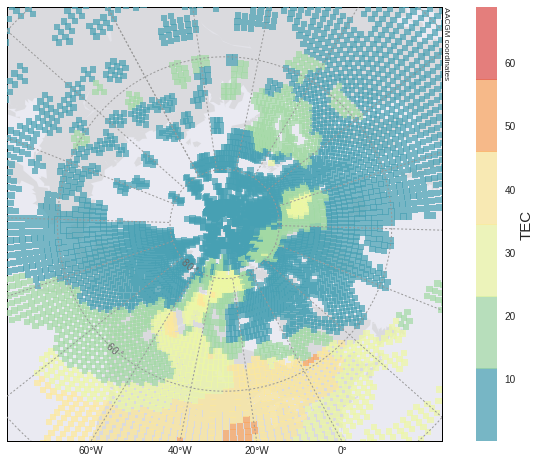

In [6]:
# set colorbar
seaMap = ListedColormap(sns.color_palette("Spectral_r"))
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
m1 = utils.plotUtils.mapObj(boundinglat=50,\
            coords=coords, ax=ax, datetime=patchDate)

xVec, yVec = m1(list(selTecDF["Mlon"]),\
                list(selTecDF["Mlat"]), coords=coords)
tecPlot = m1.scatter( xVec, yVec , c=selTecDF["med_tec"], s=40.,\
           cmap=seaMap, alpha=0.7, zorder=5., \
                     edgecolor='none', marker="s" )
cbar = plt.colorbar(tecPlot, orientation='vertical')
cbar.set_label('TEC', size=15)

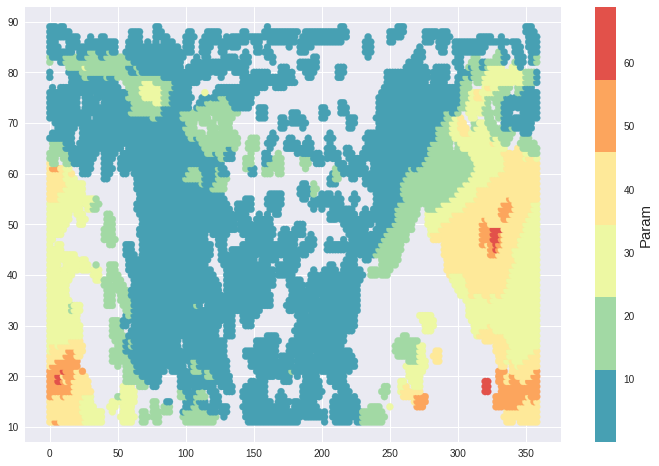

In [7]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)

cartPlot = ax.scatter( selTecDF["Mlon"].values, selTecDF["Mlat"].values,\
           c=selTecDF["med_tec"].values, cmap=seaMap )
cbar = plt.colorbar(cartPlot, orientation='vertical')
cbar.set_label('Param', size=15)
#, vmin=0., vmax=20.

In [8]:
selTecDF.to_feather("./mftec-20130117-2025.feather")